===== DATASET INFORMATION =====


,Column Name,Non-Null Count,Missing Values,Data Type
0,survived,891,0,int64
1,pclass,891,0,int64
2,sex,891,0,object
3,age,714,177,float64
4,sibsp,891,0,int64
5,parch,891,0,int64
6,fare,891,0,float64
7,embarked,889,2,object
8,class,891,0,category
9,who,891,0,object



===== AGE & FARE STATISTICAL SUMMARY =====


,Feature,Count (Non-Null),Missing,Mean,Median,Mode,Std Dev,Min,Max
0,Age,714,177,29.7,28.00,24.0,14.53,0.42,80.00
1,Fare,891,0,32.2,14.45,8.05,49.69,0.00,512.33


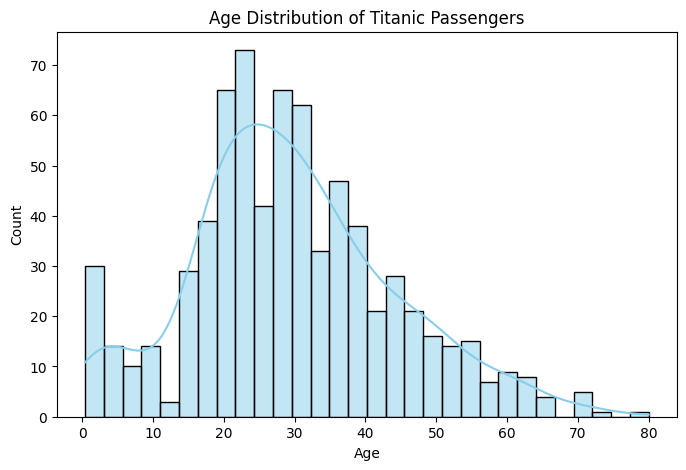

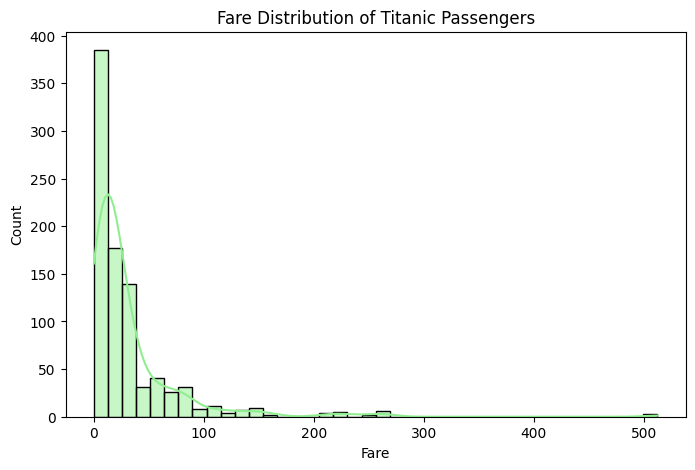

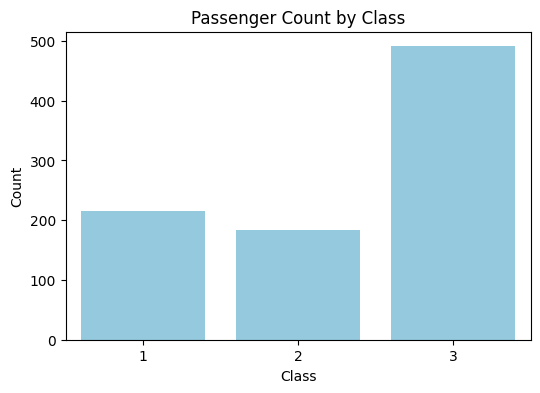

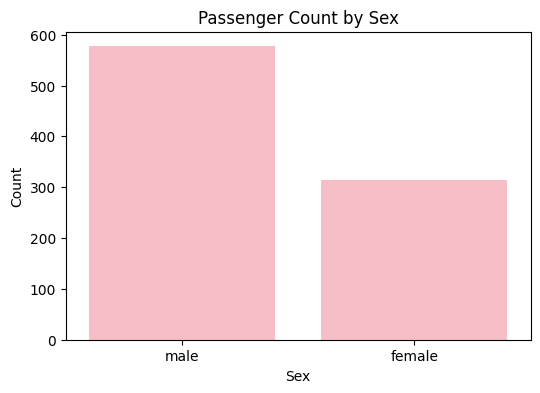

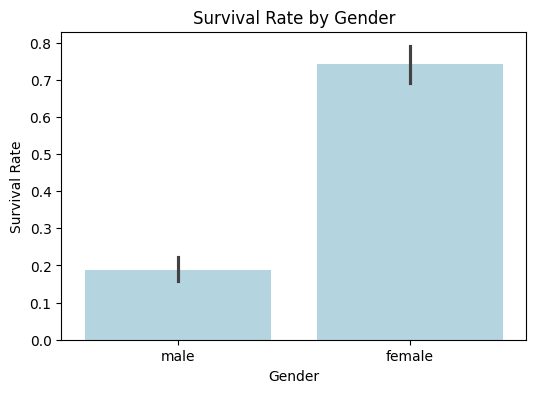

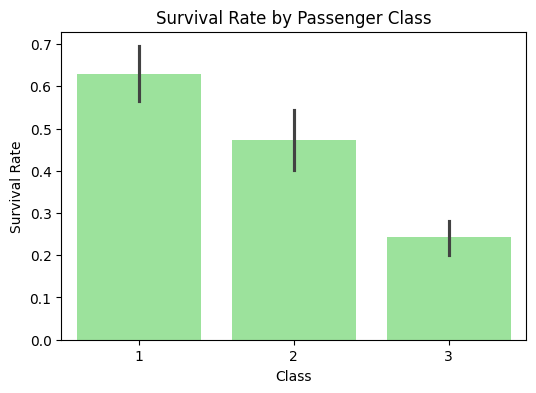

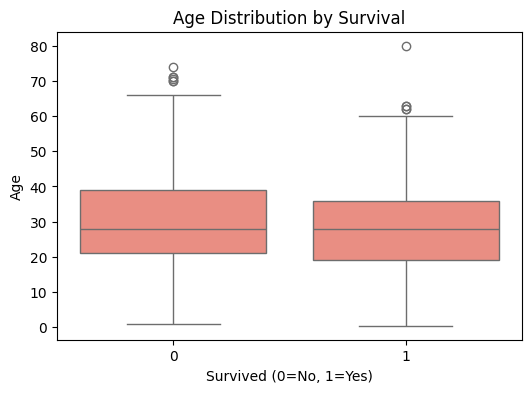

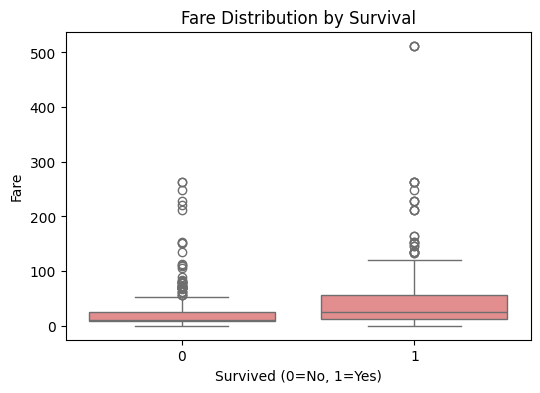

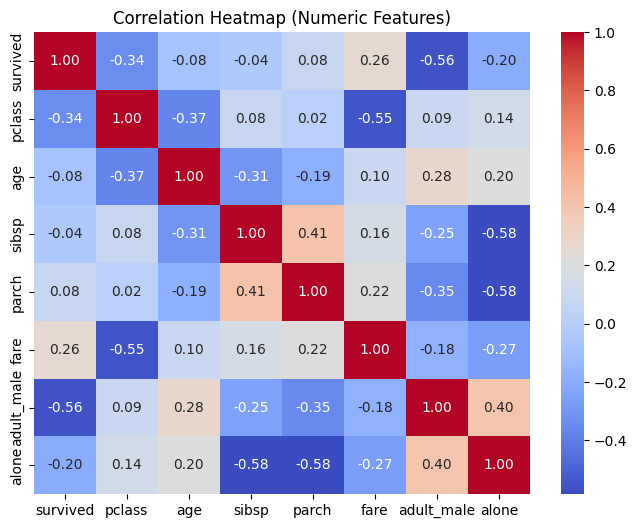

In [5]:
# ===============================
# Week 3 Assignment - Titanic Dataset (Exploratory Data Analysis)
# ===============================

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load Titanic dataset
# -------------------------------
titanic = sns.load_dataset("titanic")

# -------------------------------
# 2. Dataset Information as Table
# -------------------------------
info_table = pd.DataFrame({
    "Column Name": titanic.columns,
    "Non-Null Count": titanic.notnull().sum().values,
    "Missing Values": titanic.isnull().sum().values,
    "Data Type": titanic.dtypes.values
})

print("===== DATASET INFORMATION =====")
display(info_table)

# -------------------------------
# 3. Statistical Summaries (Age & Fare in ROW format)
# -------------------------------
def mode_str(series):
    m = series.mode(dropna=True)
    if len(m) == 0:
        return ""
    return ", ".join(str(x) for x in m.tolist())

def feature_summary(series, feature_name):
    return {
        "Feature": feature_name,
        "Count (Non-Null)": series.count(),
        "Missing": series.isna().sum(),
        "Mean": round(series.mean(), 2),
        "Median": round(series.median(), 2),
        "Mode": mode_str(series),
        "Std Dev": round(series.std(), 2),
        "Min": round(series.min(), 2),
        "Max": round(series.max(), 2)
    }

age_summary = feature_summary(titanic["age"], "Age")
fare_summary = feature_summary(titanic["fare"], "Fare")

stats_df = pd.DataFrame([age_summary, fare_summary])

print("\n===== AGE & FARE STATISTICAL SUMMARY =====")
display(stats_df)

# -------------------------------
# 4. Distribution Plots
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(titanic["age"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(titanic["fare"].dropna(), bins=40, kde=True, color="lightgreen")
plt.title("Fare Distribution of Titanic Passengers")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 5. Count Plots
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="pclass", data=titanic, color="skyblue")
plt.title("Passenger Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=titanic, color="lightpink")
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 6. Survival by Category
# -------------------------------
plt.figure(figsize=(6,4))
sns.barplot(x="sex", y="survived", data=titanic, color="lightblue")
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="pclass", y="survived", data=titanic, color="lightgreen")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.show()

# -------------------------------
# 7. Boxplots (Age/Fare vs Survival)
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x="survived", y="age", data=titanic, color="salmon")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="survived", y="fare", data=titanic, color="lightcoral")
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Fare")
plt.show()

# -------------------------------
# 8. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
